#  MINORPROJECT-1

In [115]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

NOW READING THE FILE OR DATA WE WANT TO ANALYSE


In [116]:
df = pd.read_csv(r"C:\Users\deept\Documents\mobile_price_range_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


DIMENSIONS OF THE TAKEN DATA


In [117]:
df.shape

(2000, 21)

REMOVE HANDLE NULL VALUES 

In [118]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are NO null values so we don't have to remove null by replacing them with mean of the individual data


SPLITING THE DATA INTO TRAINING AND TESTING DATA


In [119]:
x = df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'   ]]             # dataframe
y = df['price_range' ]  # series
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [120]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [121]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


now spliting the training and testing data with respect to x and y
 

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


the data had been splited

APPLYING THE FOLLOWING MODELS ON TRAINING DATASET AND GENERATING THE PREDICTEDVALUE FOR THE TEST DATASET
  

$ STATING WITH LOGESTIC REGRESSION

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
m1 = LogisticRegression()   # ML model will be The trained on training data
m1.fit(x_train,y_train)



c:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
ypred_m1 = m1.predict(x_test)  # ML model trained on training data is used to generate the predictions on the test data
print(ypred_m1)


[3 3 0 1 1 3 2 3 3 2 3 3 1 0 2 3 3 1 3 1 1 0 1 0 0 3 1 0 1 1 0 1 0 3 2 3 0
 2 3 3 2 3 2 3 1 3 2 3 2 3 0 2 1 1 3 2 3 1 0 3 0 0 2 1 2 3 1 1 1 1 0 1 3 0
 3 2 0 1 1 2 1 1 2 1 1 3 2 1 3 1 3 1 1 3 2 1 1 2 1 1 2 3 3 2 2 2 3 2 0 1 0
 2 1 0 1 2 0 1 0 3 1 1 0 3 1 2 0 2 2 1 0 3 1 3 3 1 0 0 2 3 2 0 0 0 3 3 2 2
 2 3 1 2 0 1 3 2 2 2 2 1 2 2 1 2 3 3 3 1 3 2 0 1 2 1 2 3 0 2 0 1 3 1 1 3 2
 3 1 2 2 3 1 0 2 3 3 3 0 3 2 0 3 2 0 3 3 2 0 2 1 3 2 1 1 0 3 1 1 2 0 2 0 3
 2 2 3 3 0 1 1 0 0 3 1 2 3 0 3 1 3 2 2 1 2 3 0 3 0 2 3 0 1 1 3 3 1 0 3 0 0
 1 1 2 3 3 0 3 1 0 1 0 1 0 0 0 3 1 0 0 0 3 3 3 0 2 1 3 3 1 3 1 3 1 2 1 2 0
 2 0 3 0 0 3 1 1 2 0 3 1 1 2 1 1 2 2 3 2 3 2 2 2 0 3 3 0 2 0 0 1 1 0 1 1 0
 3 3 0 0 1 1 1 0 2 2 3 2 0 3 0 0 3 2 2 2 3 3 0 0 1 3 3 1 1 1 1 2 0 0 3 0 2
 1 3 1 3 3 1 1 1 2 3 0 3 3 3 3 1 0 2 1 0 2 2 1 2 3 1 0 3 2 2 3 3 2 2 0 2 3
 3 2 1 0 3 3 0 3 1 1 2 2 1 0 1 1 3 3 2 0 1 2 1 0 3 1 0 0 1 0 0 2 2 2 0 3 3
 1 3 0 3 0 2 3 2 0 2 1 3 0 0 2 0 2 0 1 3 0 1 2 3 3 3 3 2 0 3 2 3 1 3 3 3 3
 1 2 2 3 3 2 3 3 0 3 3 3 

Confusion Matrix and Classification Report For Logestic Regression

In [128]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[91 24  1  0]
 [17 72 35  8]
 [ 0 30 49 41]
 [ 0  2 31 99]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       116
           1       0.56      0.55      0.55       132
           2       0.42      0.41      0.42       120
           3       0.67      0.75      0.71       132

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.62      0.62      0.62       500



In [129]:
m = m1.coef_         # y = mx + c = log(p/(1-p))
c = m1.intercept_
print('Slope or Coefficient',m)
print('Intercept',c)

Slope or Coefficient [[-3.78128690e-04  3.00489017e-04  8.80428532e-04  2.90605648e-04
   1.67280968e-03  2.81121091e-04  1.41961370e-02  1.80207858e-04
   4.08787114e-02  2.57906900e-03  4.16097243e-03 -1.59953639e-03
   1.12807646e-03 -3.99614182e-03  6.58626644e-03  2.86073998e-03
   4.57260295e-03  3.57005046e-04  3.10970050e-04  2.57562167e-04]
 [ 2.29585030e-04  3.08106912e-05  9.92516170e-05  1.47824373e-04
   3.55726720e-04  1.21545378e-04  4.44206870e-03  1.14696325e-04
   1.12019569e-02  4.40301041e-05  1.10771421e-03 -1.65379376e-04
   3.73063276e-04 -6.21091252e-04  1.67002218e-03  5.18732981e-04
   2.55681868e-03  8.91706645e-05  1.93909600e-04  1.37451291e-05]
 [ 1.66937051e-04 -3.01030847e-05 -1.89045131e-05 -1.59780190e-04
   5.09373021e-04 -1.82751213e-04 -6.62248294e-03 -2.83763873e-05
  -1.05268995e-02  4.83106848e-04 -1.12419951e-03  5.37533901e-04
  -5.64961444e-04  1.46598973e-03 -2.31772665e-03 -7.27357218e-04
  -1.64043040e-03 -8.45120617e-07 -2.23996563e-04 -7.

$ NOW K-Nearest Neighbors CLASSIFICATION

In [130]:

import seaborn as sns

In [131]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [132]:
x  = df.iloc[:,:-1] # x = df[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi'   ]]

y = df.iloc[:,-1]   # y = df['price_range']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2000, 20)
(2000,)


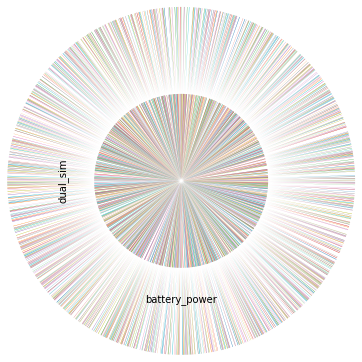

In [133]:
plt.pie(df['battery_power' ],df['dual_sim'])
plt.xlabel('battery_power')
plt.ylabel('dual_sim')
plt.show()

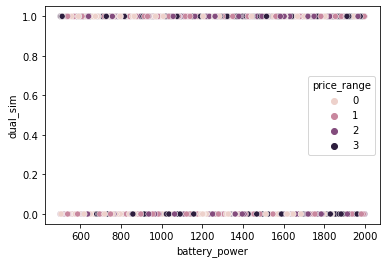

In [134]:
sns.scatterplot(x=df['battery_power'],y=df['dual_sim'],hue=df['price_range'])

plt.show()

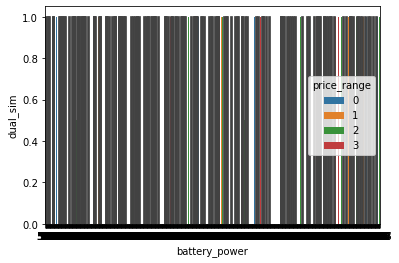

In [135]:
sns.barplot(x=df['battery_power'],y=df['dual_sim'],hue=df['price_range'])

plt.show()

SAME GOES WITH OTHER CATEGORIES ALSO ......IF WE TRY TO PLOT THEM..

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
m1 = KNeighborsClassifier(n_neighbors=12)  
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [138]:
print("Training Score",m1.score(x_train,y_train))  #model score is for accuracy
print("Testing Score",m1.score(x_test,y_test))

Training Score 0.948
Testing Score 0.93


In [139]:
ypred = m1.predict(x_test)
print(ypred)

[3 3 0 0 2 3 1 3 3 2 3 3 0 0 2 3 3 0 3 0 2 0 1 0 0 3 2 0 1 1 0 1 0 3 2 3 0
 2 3 2 2 3 2 3 2 3 2 2 2 1 0 2 1 0 2 2 2 0 0 3 1 0 3 1 2 3 1 1 1 2 0 1 3 0
 2 3 0 2 1 0 1 1 2 1 2 1 2 1 3 1 3 2 1 3 2 2 1 2 1 1 1 2 3 2 1 3 2 3 0 1 0
 3 2 0 1 3 0 0 0 3 0 0 0 2 2 3 0 2 1 2 0 3 1 3 3 2 0 0 1 3 3 1 0 1 3 3 3 3
 3 2 1 1 0 2 1 2 1 2 3 1 2 2 1 2 2 2 3 1 2 3 0 1 2 1 2 3 0 2 0 2 3 1 2 1 2
 3 0 2 1 2 1 0 3 2 3 2 0 1 2 0 2 2 0 2 3 1 0 2 2 3 1 2 2 0 2 1 1 2 1 1 1 2
 3 2 2 3 0 1 0 1 0 3 1 1 3 0 2 1 3 1 1 2 3 2 0 3 0 1 2 0 2 1 2 2 0 1 2 0 0
 0 1 2 3 3 0 3 1 0 1 0 1 0 1 0 3 2 0 0 0 3 2 3 0 3 1 3 2 0 3 1 3 1 1 2 3 0
 3 0 1 0 0 3 1 0 2 0 3 0 1 1 0 1 2 2 2 1 3 2 2 2 0 3 3 0 1 1 1 0 1 1 1 1 1
 3 3 0 0 2 1 2 0 2 3 3 2 0 3 1 0 2 3 2 2 3 3 0 0 1 2 3 0 1 1 1 1 0 1 2 0 2
 1 3 1 3 1 1 1 2 1 2 0 2 3 2 2 1 0 3 2 0 1 1 1 1 1 0 0 2 2 2 3 3 3 1 0 2 3
 3 2 1 0 3 3 0 3 0 0 2 1 1 0 1 1 3 3 1 0 3 3 1 0 3 1 0 0 1 0 0 3 3 3 1 3 3
 1 3 0 2 0 2 3 2 1 1 1 3 1 0 3 0 1 0 1 3 0 0 1 2 3 3 2 1 0 3 1 3 1 2 2 3 3
 1 1 1 3 3 2 3 3 0 3 3 3 

Classification report and confusion matrix for K-Nearest Neighbors CLASSIFICATION

In [140]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[111   5   0   0]
 [  5 120   7   0]
 [  0   9 109   2]
 [  0   0   7 125]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       116
           1       0.90      0.91      0.90       132
           2       0.89      0.91      0.90       120
           3       0.98      0.95      0.97       132

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



$ SVM CLASSIFIER WITH LINEAR AND RBF KERNEL

In [141]:
from sklearn.svm import SVC

In [142]:
m1 = SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)



SVC(C=1, kernel='linear')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

Confusion matrix and classification report for svm classifier

In [145]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[113   3   0   0]
 [  2 126   4   0]
 [  0   4 111   5]
 [  0   0   2 130]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       116
           1       0.95      0.95      0.95       132
           2       0.95      0.93      0.94       120
           3       0.96      0.98      0.97       132

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



### first Applying SVM with rbf kernel

In [146]:
m2 = SVC(kernel='rbf',gamma=0.1,C=0.1)
m2.fit(x_train,y_train)

SVC(C=0.1, gamma=0.1)

In [147]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.256
Testing Score 0.232


### Now Applying SVM with poly kernel

In [148]:
m3 = SVC(kernel='poly',degree=3,C=10)
m3.fit(x_train,y_train)

SVC(C=10, kernel='poly')

In [149]:
print('Training Score',m3.score(x_train,y_train))
print('Testing Score',m3.score(x_test,y_test))

Training Score 0.974
Testing Score 0.952


## PREDIC THE PRICE RANGE FOR TEST DATA

In [153]:
price_pred_m1 = m1.predict(x_test) #Predictions on Testing data
print(price_pred_m1)


[3 3 0 0 2 3 1 3 3 2 3 3 0 0 2 3 3 0 3 0 2 0 1 0 0 3 2 0 1 1 0 1 0 3 2 3 0
 2 3 2 2 3 2 3 2 2 2 2 2 1 0 2 1 0 2 2 2 0 0 3 1 0 3 1 3 3 1 1 2 2 0 1 3 0
 2 3 0 2 1 0 1 1 2 1 2 1 2 1 3 1 3 2 1 3 2 2 1 2 1 1 1 2 3 2 1 3 2 3 0 1 0
 3 2 0 1 3 0 0 0 3 0 0 0 3 2 3 0 2 2 2 0 3 1 3 3 2 0 1 1 3 3 0 0 1 3 3 3 3
 3 2 1 1 0 3 1 2 1 2 3 1 2 2 1 2 2 3 3 1 2 3 0 1 2 1 1 3 0 2 0 1 3 1 2 1 2
 3 1 2 1 2 1 0 3 3 3 3 0 1 2 0 2 2 0 2 3 1 0 2 2 3 1 1 2 0 3 1 1 2 0 1 1 2
 3 2 2 3 0 1 0 1 0 3 1 1 3 0 2 1 3 1 1 2 3 2 0 3 0 1 2 0 2 2 2 2 0 1 2 0 0
 0 1 2 3 3 1 3 1 0 1 0 1 0 0 0 3 2 0 0 0 3 2 3 0 3 1 3 3 0 3 1 3 1 1 2 3 1
 3 0 1 0 0 3 1 0 2 0 3 0 1 1 1 1 2 2 2 1 3 2 2 2 0 3 3 0 1 1 1 0 1 1 1 1 1
 3 3 0 0 2 1 2 0 2 3 3 3 0 3 1 0 2 3 2 1 3 3 0 0 1 2 3 0 1 1 1 1 0 1 3 0 2
 2 3 1 3 1 1 1 2 1 2 0 2 3 2 3 1 0 3 2 0 1 1 1 1 1 0 0 2 2 2 3 3 3 2 0 2 3
 3 2 1 0 3 3 0 3 1 0 2 1 1 0 1 1 3 3 1 0 3 3 2 0 3 1 0 0 1 0 0 3 2 3 0 3 3
 1 3 0 2 0 2 3 2 1 1 1 3 0 1 3 0 1 0 1 3 0 0 1 2 3 3 2 1 0 3 1 3 0 2 3 2 2
 2 1 1 3 3 2 3 3 0 3 3 3 

# BEST ACCURACY

In [154]:
print("Training Score",m1.score(x_train,y_train))  
print("Testing Score",m1.score(x_test,y_test))

Training Score 0.994
Testing Score 0.96
